In [1]:
import pandas as pd
import numpy as np
import missingno as msno 
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',100)

In [3]:
data = pd.read_csv('/home/ef/Downloads/avocado.csv')

In [4]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
#Dimensión del df
data.shape

(18249, 14)

In [ ]:
#CALIDAD DE DATOS

In [7]:
#Renombrar columnas
data.rename(columns={'Unnamed: 0':'ID'},inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
#Convertir a fecha
data['Date']=pd.to_datetime(data['Date'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [14]:
data.columns

Index(['ID', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [93]:
num = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
cat = ['type', 'year','region']

In [17]:
1-data.isnull().sum()/data.shape[0] 

ID              1.0
Date            1.0
AveragePrice    1.0
Total Volume    1.0
4046            1.0
4225            1.0
4770            1.0
Total Bags      1.0
Small Bags      1.0
Large Bags      1.0
XLarge Bags     1.0
type            1.0
year            1.0
region          1.0
dtype: float64

<AxesSubplot:>

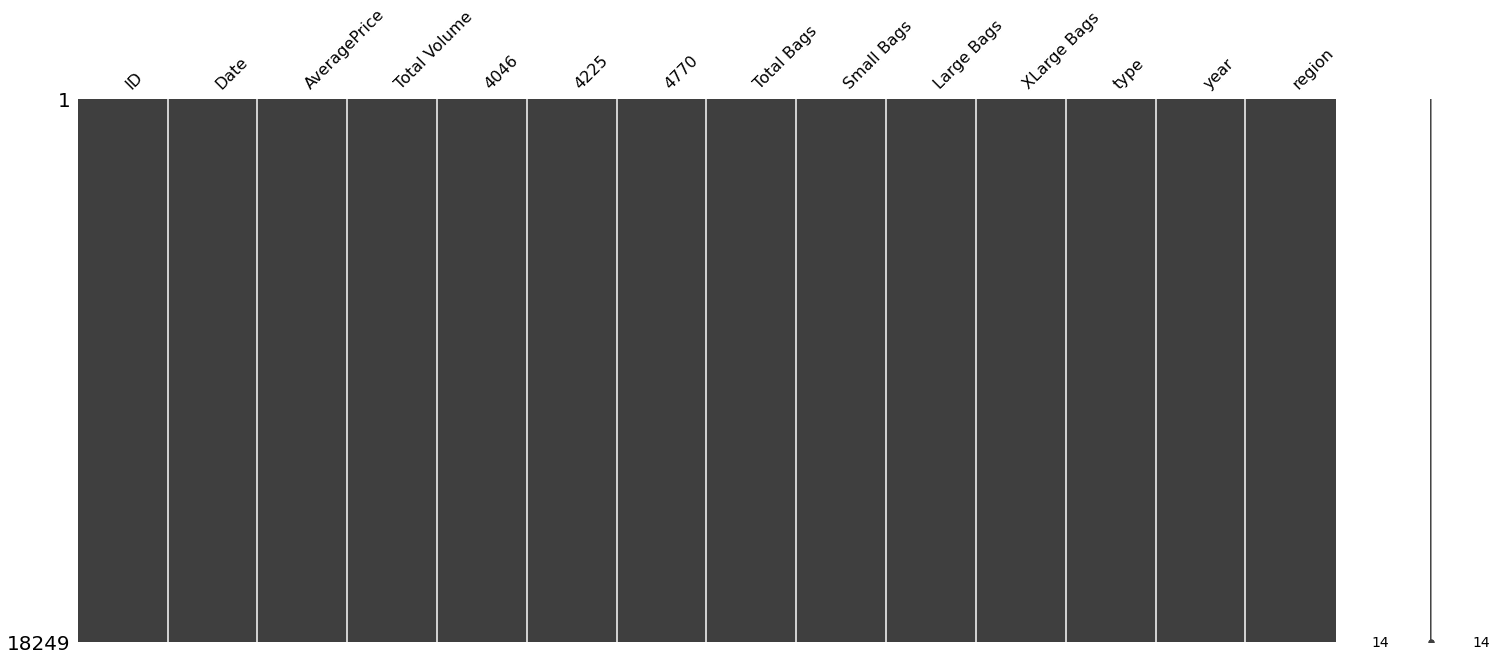

In [18]:
msno.matrix(data)
#NO hay datos nulos (yeah!)

In [19]:
#Estandarización manual
for col in num:
    data[f'{col}_std']=(data[col]-data[col].mean())/data[col].std()

#Guardar las nuevas columnas en un objeto
var_std=[col for col in data.columns if col.endswith('std')]

#Describe te muestra la distribución de columnas numéricas
data[var_std].describe([i/100 for i in range(10,100,10)]).round(4)

#Existen outliers máximos para todas las variables numéricas y outlier mínimo en el precio promedio 

,AveragePrice_std,Total Volume_std,4046_std,4225_std,4770_std,Total Bags_std,Small Bags_std,Large Bags_std,XLarge Bags_std
count,18249.0000,18249.0000,18249.0000,18249.0000,18249.0000,18249.0000,18249.0000,18249.0000,18249.0000
mean,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-2.3989,-0.2463,-0.2316,-0.2451,-0.2125,-0.2430,-0.2442,-0.2227,-0.1756
10%,-1.1820,-0.2452,-0.2316,-0.2448,-0.2125,-0.2417,-0.2434,-0.2227,-0.1756
20%,-0.8840,-0.2439,-0.2312,-0.2435,-0.2125,-0.2396,-0.2419,-0.2226,-0.1756
30%,-0.6357,-0.2419,-0.2305,-0.2416,-0.2125,-0.2356,-0.2378,-0.2214,-0.1756
40%,-0.3625,-0.2341,-0.2291,-0.2360,-0.2121,-0.2261,-0.2288,-0.2182,-0.1756
50%,-0.0893,-0.2152,-0.2248,-0.2210,-0.2108,-0.2027,-0.2088,-0.2119,-0.1756
60%,0.1838,-0.1906,-0.2066,-0.2009,-0.2054,-0.1798,-0.1816,-0.1978,-0.1756


In [24]:
#data2 = data[(data['AveragePrice']>data['AveragePrice'].quantile(.05))
#                      &(data['AveragePrice']<data['AveragePrice'].quantile(.95))]
data2 = data[~((data['Total Volume']>data['Total Volume'].quantile(.95)))]
data2 = data2[~((data2['4046']>data2['4046'].quantile(.95)))]
data2 = data2[~((data2['4225']>data2['4225'].quantile(.95)))]
data2 = data2[~((data2['4770']>data2['4770'].quantile(.95)))]
#no se omiten los outliers de total bags porque es la suma de las siguientes 3 columnas
data2 = data2[~((data2['Small Bags']>data2['Small Bags'].quantile(.95)))]
data2 = data2[~((data2['Large Bags']>data2['Large Bags'].quantile(.95)))]
data2 = data2[~((data2['XLarge Bags']>data2['XLarge Bags'].quantile(.95)))]

In [25]:
#Omitimos el 30% del total de registros, es bastante pero con el análisis gráfico concluimos que es necesario
data2.shape[0]/data.shape[0]

0.69817524247904

<AxesSubplot:>

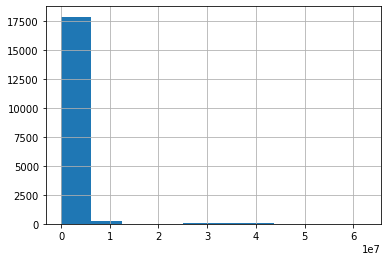

In [28]:
#ANTES
data['Total Volume'].hist()

<AxesSubplot:>

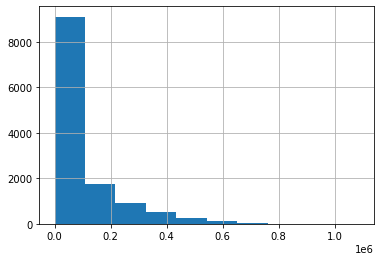

In [29]:
#DESPUÉS
data2['Total Volume'].hist()

<AxesSubplot:>

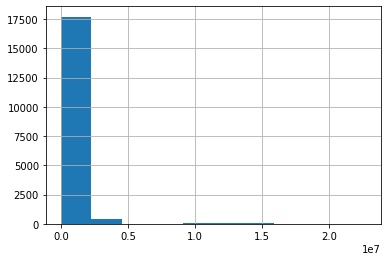

In [30]:
#ANTES
data['4046'].hist()

<AxesSubplot:>

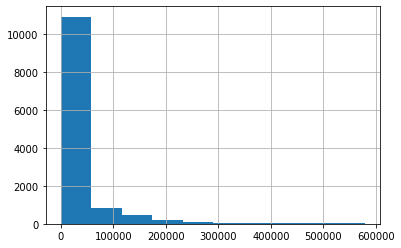

In [38]:
#DESPUÉS
data2['4046'].hist()

<AxesSubplot:>

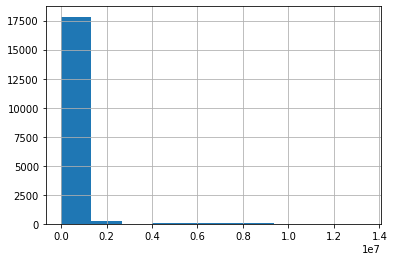

In [39]:
#ANTES
data['Small Bags'].hist()

<AxesSubplot:>

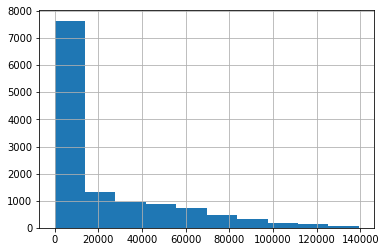

In [40]:
#DESPUÉS
data2['Small Bags'].hist()

In [ ]:
#INGENIERÍA DE VARIABLES

In [42]:
data2[num].describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,12741.000000,1.274100e+04,12741.000000,12741.000000,12741.00000,12741.000000,12741.000000,12741.000000,12741.000000
mean,1.520366,9.289046e+04,27795.638359,35376.560831,1217.49537,28499.143456,22406.408916,6036.238061,56.495929
std,0.391758,1.377783e+05,65270.376320,67562.885681,3208.31610,34772.316009,29379.974527,11181.854119,233.984183
min,0.440000,8.456000e+01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.230000,6.991110e+03,340.200000,1416.230000,0.00000,2717.230000,1302.930000,14.390000,0.000000
50%,1.500000,2.351436e+04,2133.740000,6533.700000,11.82000,10358.380000,7524.280000,892.440000,0.000000
75%,1.780000,1.281088e+05,16980.320000,37610.340000,431.28000,47821.850000,36180.970000,6028.550000,0.000000
max,3.250000,1.086740e+06,579515.760000,443903.930000,19961.19000,190144.100000,139363.880000,58844.050000,1768.970000


In [52]:
data2['Total_revenue'] = data2['AveragePrice']*data2['Total Volume']
data2['Avoc_p_bag'] = np.where(data2['Total Bags']==0, 0, data2['Total Volume']/data2['Total Bags'])
data2['Missed_bags'] = round(data2['Total Bags'] - data2['Small Bags'] - data2['Large Bags'] - data2['XLarge Bags'],0)

In [53]:
data2[['Total_revenue', 'Avoc_p_bag', 'Missed_bags']].describe()

,Total_revenue,Avoc_p_bag,Missed_bags
count,1.274100e+04,12741.000000,12741.000000
mean,1.178595e+05,10.243155,0.000549
std,1.648644e+05,139.728710,0.049325
min,1.344504e+02,0.000000,-1.000000
25%,1.127379e+04,1.539606,0.000000
50%,3.785545e+04,2.459755,0.000000
75%,1.668301e+05,4.150595,0.000000
max,1.264747e+06,7708.260450,1.000000


In [62]:
#df[col].dt.year/month/week/etc para una columna con formato de fecha
data2['Month'] = data2['Date'].dt.month

In [63]:
data2['Month'].value_counts()

1     1381
3     1290
2     1197
10    1128
5     1054
11    1039
4     1007
12     994
8      955
7      947
9      935
6      814
Name: Month, dtype: int64

In [94]:
#La relación entre variables numéricas más grande es el ingreso total vs el total de aguacates vendidos,
#ya que la variable ingreso fue creada a partir de la otra
num = num + ['Total_revenue', 'Avoc_p_bag', 'Missed_bags']
data2[num].corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Total_revenue,Avoc_p_bag,Missed_bags
AveragePrice,1.000000,-0.432969,-0.381967,-0.285487,-0.326026,-0.413792,-0.371287,-0.307504,-0.177996,-0.313316,0.041032,-0.002366
Total Volume,-0.432969,1.000000,0.800253,0.820555,0.547731,0.815264,0.780894,0.478256,0.248591,0.958119,-0.019588,0.030679
4046,-0.381967,0.800253,1.000000,0.358874,0.442163,0.555689,0.488765,0.441097,0.129937,0.694240,-0.007219,0.022278
4225,-0.285487,0.820555,0.358874,1.000000,0.449289,0.593180,0.611050,0.234276,0.230623,0.833212,-0.011202,0.022924
4770,-0.326026,0.547731,0.442163,0.449289,1.000000,0.375076,0.398415,0.115227,0.206866,0.485659,-0.014350,0.015163
Total Bags,-0.413792,0.815264,0.555689,0.593180,0.375076,1.000000,0.952572,0.601124,0.273911,0.829432,-0.040971,0.033801
Small Bags,-0.371287,0.780894,0.488765,0.611050,0.398415,0.952572,1.000000,0.329497,0.251155,0.799528,-0.037860,0.020542
Large Bags,-0.307504,0.478256,0.441097,0.234276,0.115227,0.601124,0.329497,1.000000,0.170956,0.473125,-0.027696,0.051380
XLarge Bags,-0.177996,0.248591,0.129937,0.230623,0.206866,0.273911,0.251155,0.170956,1.000000,0.259537,-0.011212,-0.011762
Total_revenue,-0.313316,0.958119,0.694240,0.833212,0.485659,0.829432,0.799528,0.473125,0.259537,1.000000,-0.018475,0.036477


<AxesSubplot:xlabel='Date'>

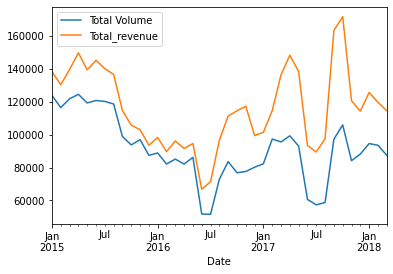

In [97]:
#Por ello, el comportamiento mensual promedio tiene gran similitud entre estas variables
data_month = data2[['Total Volume', 'Total_revenue', 'Date']].groupby(pd.Grouper(key='Date', freq="1MS")).mean()
data_month.plot()

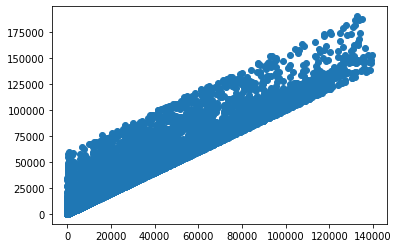

In [98]:
#Ahora, se comprueba con una gráfica de dispersión que el total de bolsas vendidas depende de las bolsas pequeñas vendidas
X = data2['Small Bags']
y = data2['Total Bags']
plt.scatter(X,y)